graph is flexible


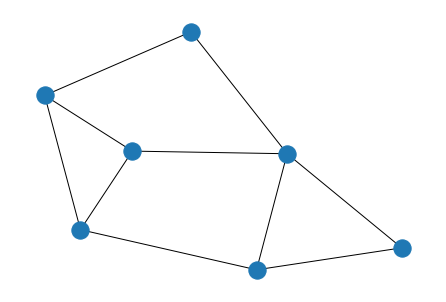

In [2]:
import networkx as nx
import itertools
import sympy as sy

def lamans_theorem(G,d):
    comparison = laman_comparison(G,d)
    if comparison == -1: return -1      # flexible if less than 2n-3 links
    subgraphs = get_subgraphs(G)
    if len(subgraphs) == 1: return 0 if G.number_of_edges() == 3 else -1 # we have only one subgraph
    if comparison ==0:                # exactly 2n-3 links, lets check subassemblies
        for graph in subgraphs:
            if laman_comparison(graph,d)==1: return -1   # flexible if there is one subgraph that has more than nk-3 links
        return 0                        # condition 1: has exactly 2n-3 links and every subgraph has at most 2k-3 links
    elif comparison == 1:               # more than 2n-3 links, look for a rigid subgraph
        for graph in subgraphs:
            if lamans_theorem(graph,d) == 0: return 1  # condition 2: has more than 2n-3 links and contains a generically rigid subgraph with 2n-3 links
        return -1                       # there is no rigid subgraph with 2n-3, so the graph is flexible
    
def laman_comparison(G,d):
    n = G.number_of_nodes()
    e = G.number_of_edges()
    res = d*n-sy.binomial(d+1,2)
    if e < res :return -1
    if e == res:return 0
    if e > res :return 1
    
def get_subgraphs(G,k):
    subgraphs = []
    for nb_nodes in range(k, G.number_of_nodes()):  # find all subsets of 3 or more neighboring nodes in the graph
        for sg in (G.subgraph(selected_nodes)
            for selected_nodes in itertools.combinations(G, nb_nodes)): # select all combinations of three nodes from the graph
                if nx.is_connected(sg):subgraphs.append(sg) # if the nodes form a connected subgraph, append them to the subgraphs
    return subgraphs

graph = nx.Graph()
dimension = 2
#graph.add_edges_from([(1,2),(2,3),(3,4),(4,1),(4,2)])
graph.add_edges_from([(1,2),(2,3),(3,1),(1,6),(6,5),(6,7),(7,5),(5,4),(4,2),(3,5)])
nx.draw(graph)
print("graph is flexible" if lamans_theorem(graph,dimension)==-1 else "graph is rigid")
